# Introduction:

Attemtping to create a baseline data table that looks at the general subject demographics. 

1. Create a summary table for Age, Sex, Roles, BMI, Exercise status, etc.
2. Create a summary table for the case data.
3. Create a summary table for the discomfort survey.
4. Create a summary table for the radiation data.

### Importing the Libraries:

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data:

In [2]:
# Load in the case data
case_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\Extra Data\\CASEDATA_RAMPART_WITH LABELS.csv')
# Demographic Data
demographic_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\Extra Data\\BASELINESURVEY_RAMPART_WITH LABELS.csv')
# Load in the discomfort data
discomfort_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\Extra Data\\Discomfort Survey.csv')
# Load in the sum of duration merged dataset
sum_duration = pd.read_csv('C:\\Users\\jrzem\\OneDrive\\Coding Applications\\Harvard Study\\CSVs\\Full Sum of Duration Merged\\combined_sum_duration.csv')

# Tables:

In [3]:
operators_list = [1, 2, 3, 4, 5, 6,
    7, 8, 19, 20, 21, 22, 23,
    24, 26, 27, 28, 29, 30, 31]

In [4]:
demographic_data = demographic_data[demographic_data['Participant ID'].isin(operators_list)]

### 1. Basic Demographics:

In [5]:
# View the dataset
demographic_data.head()

,Participant ID,Age,Race,Ethnicity,Gender,Role in cath lab,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Weight of Lead (lbs),...,Other Injury,Have you ever had surgery for orthopedic injury?,Do you have any chronic pain syndromes?,Neck Pain,Back Pain,Shoulder Pain,Arm Pain,Leg Pain,Other Pain,Complete?
0,1,34,Black African,Not Hispanic or Latino,female,Interventional Fellow,2.0,65,168,NaN,...,Unchecked,No,No,Unchecked,Checked,Checked,Unchecked,Unchecked,Unchecked,Complete
1,2,34,White Middle Eastern,Not Hispanic or Latino,male,Interventional Fellow,2.0,69,145,NaN,...,Unchecked,No,No,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete
2,3,35,Caucasian,Hispanic or Latino,male,Interventional Fellow,4.0,70,170,NaN,...,Unchecked,No,No,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete
3,4,34,South Asian,Not Hispanic or Latino,male,Interventional Fellow,5.0,65,180,NaN,...,Checked,Yes,No,Checked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Complete
4,5,33,South Asian,Not Hispanic or Latino,male,Interventional Fellow,2.0,68,168,NaN,...,Unchecked,No,No,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete


First looking at race and ethnicity:

In [6]:
# Percentage values of race
demographic_data['Race '].value_counts(normalize=True) * 100

Race 
Caucasian               35.0
South Asian             30.0
White North American    15.0
White Middle Eastern     5.0
Black African            5.0
White European           5.0
Asian-East               5.0
Name: proportion, dtype: float64

In [7]:
# Percentages of ethnicity
demographic_data['Ethnicity '].value_counts(normalize=True) * 100

Ethnicity 
Not Hispanic or Latino    90.0
Hispanic or Latino        10.0
Name: proportion, dtype: float64

Now looking at the average ages:

In [8]:
# Calculate the descriptive statistics of age
demographic_data['Age'].describe()

count    20.000000
mean     41.100000
std       9.480728
min      31.000000
25%      34.000000
50%      37.500000
75%      47.500000
max      62.000000
Name: Age, dtype: float64

Distribution of Male vs. Female:

In [9]:
# What are the percentages of male vs. female participants?
demographic_data['Gender'].value_counts(normalize=True) * 100

Gender
male      60.0
female    40.0
Name: proportion, dtype: float64

Role in cath lab:

In [10]:
# Percentages of the roles in cath lab
demographic_data['Role in cath lab'].value_counts(normalize=True) * 100

Role in cath lab
Interventional Fellow    45.0
Attending                30.0
Physician Assistant      20.0
General Fellow            5.0
Name: proportion, dtype: float64

BMI:

In [11]:
# Convert height from inches to meters and weight from pounds to kilograms
demographic_data['Height_m'] = demographic_data['Participant Height (in)'] * 0.0254
demographic_data['Weight_kg'] = demographic_data['Participant Weight (lbs)'] * 0.453592

# Calculate BMI
demographic_data['BMI'] = demographic_data['Weight_kg'] / (demographic_data['Height_m'] ** 2)

# Descriptive Statistcs BMI
demographic_data['BMI'].describe()

count    20.000000
mean     26.276977
std       4.326379
min      19.739486
25%      22.685912
50%      26.019943
75%      29.373392
max      33.281373
Name: BMI, dtype: float64

Years worked:

In [12]:
# calculate summary stats for the years worked in the cath lab
demographic_data['How many years has the participant worked in the cardiac catheterization laboratory?'].describe()

count    17.000000
mean      6.235294
std       7.258869
min       1.000000
25%       2.000000
50%       3.000000
75%       6.000000
max      25.000000
Name: How many years has the participant worked in the cardiac catheterization laboratory?, dtype: float64

Exercise status:

In [13]:
# calculate percentages for exercise
demographic_data['Do you exercise...'].value_counts(normalize=True) * 100

Do you exercise...
2-3 days a week     52.631579
1-3 days a month    15.789474
4+ days a week      15.789474
1 day a week        10.526316
Not at all           5.263158
Name: proportion, dtype: float64

In [14]:
# Types of exercise:
types_exercise = ['Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Abdominal strength training', 'Yoga',
       'Stretching', 'Pilates', 'Other Exercise']
# Calculate the percentages for each of the columns
demographic_data[types_exercise].value_counts(normalize=True) * 100

Cardio     Upper Body Strength Training  Lower body strength training  Abdominal strength training  Yoga       Stretching  Pilates    Other Exercise
Checked    Unchecked                     Unchecked                     Unchecked                    Unchecked  Unchecked   Unchecked  Unchecked         25.0
           Checked                       Checked                       Checked                      Unchecked  Checked     Unchecked  Unchecked         15.0
                                                                                                               Unchecked   Unchecked  Unchecked         10.0
                                                                       Unchecked                    Unchecked  Unchecked   Unchecked  Unchecked          5.0
                                                                       Checked                      Checked    Unchecked   Unchecked  Unchecked          5.0
                                         Unchecked                

Orthopedic injuries:

In [15]:
# History of Orthopedic Injuries
demographic_data['Do you have a history of orthopedic injury?'].value_counts(normalize=True) * 100

Do you have a history of orthopedic injury?
No     65.0
Yes    35.0
Name: proportion, dtype: float64

In [16]:
# Columns for orthopedic injury types:
type_orthopedics = ['Neck Injury',
       'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
       'Other Injury','Have you ever had surgery for orthopedic injury?']
# Calculate the percentages for each of the columns
demographic_data[type_orthopedics].value_counts(normalize=True) * 100

Neck Injury  Back Injury  Shoulder Injury  Leg Injury  Arm Injury  Other Injury  Have you ever had surgery for orthopedic injury?
Unchecked    Unchecked    Unchecked        Unchecked   Unchecked   Unchecked     No                                                  65.0
                                           Checked     Unchecked   Unchecked     Yes                                                 10.0
             Checked      Unchecked        Unchecked   Unchecked   Unchecked     No                                                   5.0
             Unchecked    Checked          Unchecked   Unchecked   Unchecked     No                                                   5.0
             Checked      Unchecked        Unchecked   Unchecked   Unchecked     Yes                                                  5.0
             Unchecked    Unchecked        Checked     Checked     Unchecked     No                                                   5.0
                                          

Chronic Pain syndromes:

In [17]:
# History of chronic pain
demographic_data['Do you have any chronic pain syndromes?'].value_counts(normalize=True) * 100

Do you have any chronic pain syndromes?
No     95.0
Yes     5.0
Name: proportion, dtype: float64

In [18]:
# Columns for chronic pain types:
type_pain = ['Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain']
# Calculate the percentages for each of the columns
demographic_data[type_pain].value_counts(normalize=True) * 100

Neck Pain  Back Pain  Shoulder Pain  Arm Pain   Leg Pain   Other Pain
Unchecked  Unchecked  Unchecked      Unchecked  Unchecked  Unchecked     55.0
           Checked    Unchecked      Unchecked  Unchecked  Unchecked     15.0
                      Checked        Unchecked  Unchecked  Unchecked     10.0
Checked    Unchecked  Unchecked      Unchecked  Unchecked  Unchecked      5.0
                      Checked        Unchecked  Unchecked  Unchecked      5.0
           Checked    Unchecked      Unchecked  Unchecked  Unchecked      5.0
Unchecked  Checked    Checked        Unchecked  Checked    Unchecked      5.0
Name: proportion, dtype: float64

### 2. Case Data:

In [19]:
operators_case_list = [ '1_001', '2_001', '4_001', '2_002', '3_002', 
    '1_003', '2_003', '4_003',             
    '1_004', '2_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', '1_020','2_020', '1_021','2_021',
    '1_022', '4_022', '1_023',
    '2_023', '1_024','2_024', '1_026', '2_026','1_027',
    '1_028', '2_028', '1_029', '2_029',
    '2_030', '3_030', '2_031',    '3_001','6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031']

In [20]:
case_data = case_data[case_data['Participant ID'].isin(operators_case_list)]

In [21]:
case_data.head()

,Participant ID,Age,Race,Ethnicity,Gender,Role in cath lab,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Weight of Lead (lbs),...,Type of Case,Total case length in minutes (first lidocaine injection - sheath removal),Total radiation (mGy) from procedure log,Participant radiation (mrem),Control Radiation (mrem),Total contrast (mL),Muscular Discomfort Scale Completed?,Sensor/ Data Malfunctions during case,Comments,Complete?
0,1_001,34,Black African,Not Hispanic or Latino,female,Interventional Fellow,2.0,65,168,NaN,...,Coronary Arteriogram w/ no intervention,36,456.0,0.6,61.9,70.0,Yes,none,ROM data taken from this case,Complete
1,2_001,34,Black African,Not Hispanic or Latino,female,Interventional Fellow,2.0,65,168,NaN,...,Coronary Arteriogram w/ no intervention,44,331.0,0.0,18.3,90.0,Yes,NaN,NaN,Complete
2,3_001,34,Black African,Not Hispanic or Latino,female,Interventional Fellow,2.0,65,168,NaN,...,Complex PCI,283,4276.7,0.5,569.8,190.0,Yes,Database stopped recording at ** time. Began r...,NaN,Complete
3,4_001,34,Black African,Not Hispanic or Latino,female,Interventional Fellow,2.0,65,168,NaN,...,Coronary Arteriogram w/ no intervention,52,798.6,NaN,61.0,75.0,Yes,participant wearing radiation sensor under lea...,NaN,Complete
5,6_001,34,Black African,Not Hispanic or Latino,female,Interventional Fellow,2.0,65,168,NaN,...,CTO PCI,223,3668.8,0.3,95.0,300.0,Yes,NaN,NaN,Complete


Case for the day:

In [22]:
# Cases for each subject
case_data['Case Number for the day'].value_counts(normalize=True) * 100

Case Number for the day
Second    40.983607
First     37.704918
Third     13.114754
Fourth     8.196721
Name: proportion, dtype: float64

In [23]:
# Case being done
case_data['Case being done...'].value_counts(normalize=True) * 100

Case being done...
Without Rampart shield    62.295082
With Rampart shield       37.704918
Name: proportion, dtype: float64

In [24]:
# What is the pariticipant wearing?
case_data['Participant wearing...' ].value_counts(normalize=True) * 100

Participant wearing...
lead       65.57377
no lead    34.42623
Name: proportion, dtype: float64

Sleep habits:


In [25]:
# Hours of sleep
case_data[ 'How many hours of sleep did participant have the night before'].describe()

count    57.000000
mean      6.096491
std       1.188444
min       3.000000
25%       5.500000
50%       6.000000
75%       7.000000
max       9.000000
Name: How many hours of sleep did participant have the night before, dtype: float64

Case Type/Length:

In [26]:
# Percentage of the type of case
case_data['Type of Case'].value_counts(normalize=True) * 100

Type of Case
Coronary Arteriogram w/ no intervention    44.262295
TAVR                                       16.393443
Complex PCI                                13.114754
CTO PCI                                    13.114754
Non-Complex PCI                             9.836066
Other                                       1.639344
Right heart catheterization                 1.639344
Name: proportion, dtype: float64

In [27]:
# Descriptitve statistics of the case length
case_data['Total case length in minutes (first lidocaine injection - sheath removal)'].describe()

count     61.000000
mean      79.852459
std       67.526498
min       10.000000
25%       28.000000
50%       61.000000
75%      100.000000
max      308.000000
Name: Total case length in minutes (first lidocaine injection - sheath removal), dtype: float64

### 3. Discomfort Data:

In [46]:
Lead_Operators = [    '1_001', '2_001', '4_001', '2_002', '3_002',             
    '1_004', '2_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', 
    '1_022', '4_022', '1_023',
    '2_023', 
    '2_030', '3_030', '2_031']
Rampart_Operators = [
    '3_001','6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031'
]

In [47]:
discomfort_data = discomfort_data[discomfort_data['Participant ID'].isin(operators_case_list)]

In [30]:
# Replace 'Checked' with 1 and 'Unchecked' with 0 in the discomfort data
discomfort_data.replace({'Checked': 1, 'Unchecked': 0}, inplace=True)

C:\Users\jrzem\AppData\Local\Temp\ipykernel_29144\2274806587.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  discomfort_data.replace({'Checked': 1, 'Unchecked': 0}, inplace=True)


In [31]:
# Look at the descriptive statistics of the discomfort data
discomfort_data.describe()

,Repeat Instance,None (choice=Yes),None (choice=Slightly Uncomfortable),None (choice=Moderately uncomfortable),None (choice=very uncomfortable),None (choice=not at all),None (choice=slightly interfered),None (choice=substantially interfered),Neck (choice=Yes),Neck (choice=Slightly Uncomfortable),...,foot (right) (choice=not at all),foot (right) (choice=slightly interfered),foot (right) (choice=substantially interfered),foot (left) (choice=Yes),foot (left) (choice=Slightly Uncomfortable),foot (left) (choice=Moderately uncomfortable),foot (left) (choice=very uncomfortable),foot (left) (choice=not at all),foot (left) (choice=slightly interfered),foot (left) (choice=substantially interfered)
count,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,...,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0
mean,2.232143,0.892857,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,0.017857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.159797,0.312094,0.0,0.0,0.0,0.0,0.0,0.0,0.187256,0.133631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sum up the discomforts for any and showcase the percentage of lead vs. rampart.

In [48]:
# Count the total instances for Lead_Operators and Rampart_Operators
lead_instances = discomfort_data[discomfort_data['Participant ID'].isin(Lead_Operators)].shape[0]
rampart_instances = discomfort_data[discomfort_data['Participant ID'].isin(Rampart_Operators)].shape[0]

# Display the counts
print(f"Total instances for Lead Operators: {lead_instances}")
print(f"Total instances for Rampart Operators: {rampart_instances}")

Total instances for Lead Operators: 21
Total instances for Rampart Operators: 19


In [49]:
# Calculate total discomfort for Lead Operators
lead_discomfort_total = discomfort_data[discomfort_data['Participant ID'].isin(Lead_Operators)].iloc[:, 3:-1].sum().sum()

# Calculate total discomfort for Rampart Operators
rampart_discomfort_total = discomfort_data[discomfort_data['Participant ID'].isin(Rampart_Operators)].iloc[:, 3:-1].sum().sum()

# Display the results
print(f"Total discomfort for Lead Operators: {lead_discomfort_total}")
print(f"Total discomfort for Rampart Operators: {rampart_discomfort_total}")

Total discomfort for Lead Operators: 42
Total discomfort for Rampart Operators: 29


In [50]:
# Extract discomfort columns (excluding metadata columns)
discomfort_columns = discomfort_data.columns[3:-1]

# Initialize dictionaries to store results
lead_discomfort = {}
rampart_discomfort = {}

# Calculate sums for each column
for column in discomfort_columns:
    lead_discomfort[column] = discomfort_data[discomfort_data['Participant ID'].isin(Lead_Operators)][column].sum()
    rampart_discomfort[column] = discomfort_data[discomfort_data['Participant ID'].isin(Rampart_Operators)][column].sum()

# Display the results
print("Lead Discomfort:")
print(pd.Series(lead_discomfort))

print("\nRampart Discomfort:")
print(pd.Series(rampart_discomfort))

Lead Discomfort:
None (choice=Yes)                                17
None (choice=Slightly Uncomfortable)              0
None (choice=Moderately uncomfortable)            0
None (choice=very uncomfortable)                  0
None (choice=not at all)                          0
                                                 ..
foot (left) (choice=Moderately uncomfortable)     0
foot (left) (choice=very uncomfortable)           0
foot (left) (choice=not at all)                   0
foot (left) (choice=slightly interfered)          0
foot (left) (choice=substantially interfered)     0
Length: 147, dtype: int64

Rampart Discomfort:
None (choice=Yes)                                17
None (choice=Slightly Uncomfortable)              0
None (choice=Moderately uncomfortable)            0
None (choice=very uncomfortable)                  0
None (choice=not at all)                          0
                                                 ..
foot (left) (choice=Moderately uncomfortable)     0


In [51]:
# Calculate lead discomfort percentages
lead_discomfort_percentage = {k: (v / lead_instances) * 100 for k, v in lead_discomfort.items()}

# Calculate rampart discomfort percentages
rampart_discomfort_percentage = {k: (v / rampart_instances) * 100 for k, v in rampart_discomfort.items()}

In [52]:
# Filter non-zero percentages for lead discomfort
non_zero_lead_discomfort = {k: v for k, v in lead_discomfort_percentage.items() if v != 0}

# Filter non-zero percentages for rampart discomfort
non_zero_rampart_discomfort = {k: v for k, v in rampart_discomfort_percentage.items() if v != 0}

# Display the results
print("Non-zero Lead Discomfort Percentages:")
print(pd.Series(non_zero_lead_discomfort))

print("\nNon-zero Rampart Discomfort Percentages:")
print(pd.Series(non_zero_rampart_discomfort))

Non-zero Lead Discomfort Percentages:
None (choice=Yes)                                     80.952381
Neck (choice=Yes)                                      9.523810
Neck (choice=Slightly Uncomfortable)                   4.761905
Neck (choice=not at all)                               9.523810
Shoulder (right) (choice=Yes)                          9.523810
Shoulder (right) (choice=Slightly Uncomfortable)       4.761905
Shoulder (right) (choice=Moderately uncomfortable)     4.761905
Shoulder (right) (choice=not at all)                   4.761905
Shoulder (right) (choice=slightly interfered)          4.761905
Shoulder (left) (choice=Yes)                           9.523810
Shoulder (left) (choice=Slightly Uncomfortable)        4.761905
Shoulder (left) (choice=Moderately uncomfortable)      4.761905
Shoulder (left) (choice=not at all)                    4.761905
Shoulder (left) (choice=slightly interfered)           4.761905
upper back (choice=Yes)                                4.761905
up

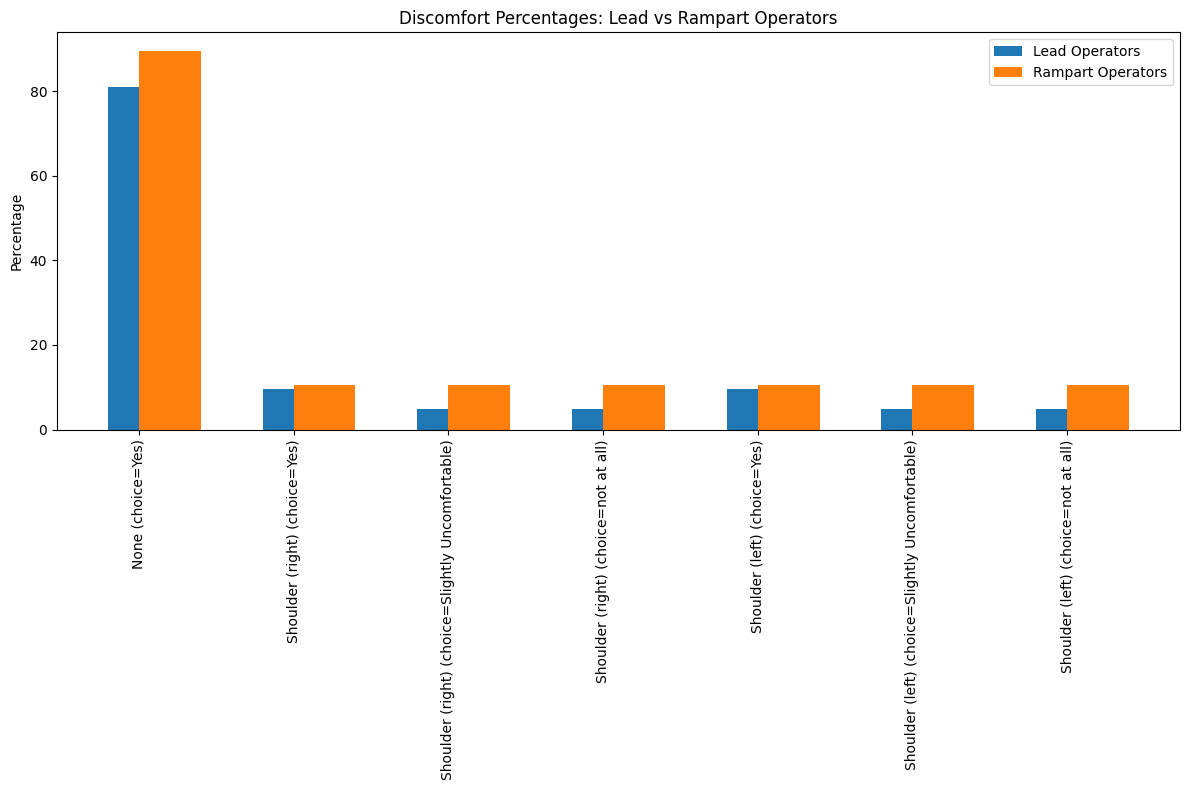

In [57]:
# Convert the dictionaries to DataFrames for easier plotting
lead_df = pd.DataFrame(list(non_zero_lead_discomfort.items()), columns=['Discomfort', 'Percentage'])
rampart_df = pd.DataFrame(list(non_zero_rampart_discomfort.items()), columns=['Discomfort', 'Percentage'])

# Merge the two DataFrames on the 'Discomfort' column
merged_df = pd.merge(lead_df, rampart_df, on='Discomfort', suffixes=('_Lead', '_Rampart'))

# Plot the data
plt.figure(figsize=(12, 8))
x = range(len(merged_df))
plt.bar(x, merged_df['Percentage_Lead'], width=0.4, label='Lead Operators', align='center')
plt.bar(x, merged_df['Percentage_Rampart'], width=0.4, label='Rampart Operators', align='edge')

# Add labels and title
plt.xticks(x, merged_df['Discomfort'], rotation=90)
plt.ylabel('Percentage')
plt.title('Discomfort Percentages: Lead vs Rampart Operators')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
merged_df

,Discomfort,Percentage_Lead,Percentage_Rampart,Percentage_Difference
0,None (choice=Yes),80.952381,89.473684,-8.521303
1,Shoulder (right) (choice=Yes),9.523810,10.526316,-1.002506
2,Shoulder (right) (choice=Slightly Uncomfortable),4.761905,10.526316,-5.764411
3,Shoulder (right) (choice=not at all),4.761905,10.526316,-5.764411
4,Shoulder (left) (choice=Yes),9.523810,10.526316,-1.002506
5,Shoulder (left) (choice=Slightly Uncomfortable),4.761905,10.526316,-5.764411
6,Shoulder (left) (choice=not at all),4.761905,10.526316,-5.764411


In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey HSD test
data = pd.melt(merged_df, id_vars=['Discomfort'], value_vars=['Percentage_Lead', 'Percentage_Rampart'], 
               var_name='Group', value_name='Percentage')

# Perform Tukey HSD test
tukey_result = pairwise_tukeyhsd(endog=data['Percentage'], groups=data['Group'], alpha=0.05)

# Display the results
print(tukey_result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2       meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------------
Percentage_Lead Percentage_Rampart   4.7977 0.7628 -29.0618 38.6572  False
--------------------------------------------------------------------------


### 4. Radiation Data:

In [32]:
# List the radiation columns
radiation_columns = [ 'Total radiation (mGy) from procedure log',
       'Participant radiation (mrem)', 'Control Radiation (mrem)',
       'Total contrast (mL)']
# Make a dataframe
radiation_data = case_data[radiation_columns]
radiation_data.head()

,Total radiation (mGy) from procedure log,Participant radiation (mrem),Control Radiation (mrem),Total contrast (mL)
0,456.0,0.6,61.9,70.0
1,331.0,0.0,18.3,90.0
2,4276.7,0.5,569.8,190.0
3,798.6,NaN,61.0,75.0
5,3668.8,0.3,95.0,300.0


In [33]:
# Descriptive Statistics for the radiation data:
radiation_data.describe()

,Total radiation (mGy) from procedure log,Participant radiation (mrem),Control Radiation (mrem),Total contrast (mL)
count,61.000000,59.000000,60.000000,59.000000
mean,715.873770,7.042373,58.513333,88.406780
std,872.868446,48.469461,94.886508,63.738182
min,14.000000,0.000000,0.300000,0.000000
25%,180.000000,0.100000,11.425000,45.000000
50%,423.000000,0.300000,27.900000,75.000000
75%,798.600000,0.750000,63.175000,105.000000
max,4276.700000,372.900000,569.800000,300.000000


# Largest Age Difference in the Population:

In [34]:
# Pull the minumum age subject from the demographic data
min_age = demographic_data['Age'].min()
# Pull the maximum age subject from the demographic data
max_age = demographic_data['Age'].max()

# What subjects are the min and max age
min_age_subjects = demographic_data[demographic_data['Age'] == min_age]
max_age_subjects = demographic_data[demographic_data['Age'] == max_age]

# Showcase the subjects that are minimum and maximum age
min_age_subjects

,Participant ID,Age,Race,Ethnicity,Gender,Role in cath lab,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Weight of Lead (lbs),...,Neck Pain,Back Pain,Shoulder Pain,Arm Pain,Leg Pain,Other Pain,Complete?,Height_m,Weight_kg,BMI
6,7,31,White North American,Hispanic or Latino,female,Interventional Fellow,3.0,65,200,NaN,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,1.6510,90.71840,33.281373
22,23,31,White European,Not Hispanic or Latino,male,General Fellow,3.0,73,215,NaN,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,1.8542,97.52228,28.365516


In [35]:
max_age_subjects

,Participant ID,Age,Race,Ethnicity,Gender,Role in cath lab,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Weight of Lead (lbs),...,Neck Pain,Back Pain,Shoulder Pain,Arm Pain,Leg Pain,Other Pain,Complete?,Height_m,Weight_kg,BMI
28,29,62,Caucasian,Not Hispanic or Latino,female,Attending,NaN,62,150,NaN,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,1.5748,68.0388,27.435055


# Conclusion:

This notebook gives insights into the general layout of the data for these different instances. 